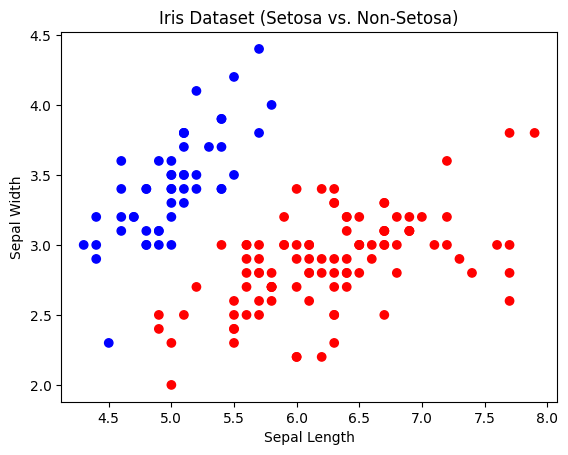

In [111]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data[:, :2]
y = data.target
y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()

In [112]:
class PCA_cust:
    def __init__(self, n_components = 2):
        self.n_components = n_components
        
    def standardize(self, X):
        means = np.array([np.mean(X[:, i]) for i in range(X.shape[1])])
        stds = np.array([np.std(X[:, i]) for i in range(X.shape[1])])
        return (X - means)/stds
    
    def covariance(self, X):
        return (X.T@X)/(X.shape[0]-1)
    
    def svd(self, A, tol=1e-10, max_iter=1000):

        AT_A = np.dot(A.T, A)
        n = AT_A.shape[0]
        
        # Initialize V
        V = np.eye(n)
        
        # Jacobi eigenvalue decomposition for AT_A
        for _ in range(max_iter):
            
            # Find largest off diagonal element of AT_A
            off_diagonal_indices = np.triu_indices(n, k=1)
            max_off_diag = np.abs(AT_A[off_diagonal_indices]).max()
            
            if max_off_diag < tol:
                break
            # Find indices of the largest off-diagonal element
            idx = np.argmax(np.abs(AT_A[off_diagonal_indices]))
            p, q = off_diagonal_indices[0][idx], off_diagonal_indices[1][idx]
            
            # Compute rotation angle
            if AT_A[p, p] == AT_A[q, q]:
                theta = np.pi / 4
            else:
                theta = 0.5 * np.arctan2(2 * AT_A[p, q], AT_A[p, p] - AT_A[q, q])
                
            # Rotate
            R = np.eye(n)
            R[p, p] = R[q, q] = np.cos(theta)
            R[p, q] = -np.sin(theta)
            R[q, p] = np.sin(theta)
            

            AT_A = R.T @ AT_A @ R
            V = V @ R
            
        singular_values = np.sqrt(np.diag(AT_A))
        
        s_inv = np.diag([1/s if s > tol else 0 for s in singular_values])
        
        U = A @ V @ s_inv

        return U, singular_values, V.T
        
    def pca(self, X):
        
        X_std = self.standardize(X)
        
        cov_matrix = self.covariance(X_std)
        
        _, _, V = self.svd(cov_matrix)
        
        components = V[:self.n_components]
        
        X_reduced = np.dot(X_std, components)
        return components
        
        
        
        

In [113]:
a = PCA_cust(n_components=2)

p =a.pca(X)

In [114]:
p

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [115]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

pca.components_

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])